# Exploratory Data Analysis And Severity Prediction Of Car Accidents In USA

US-Accident dataset is a countrywide car accident dataset with around 3 million records, which covers 49 states of the United States.


#### Objective:
The main objective of this project is to identify and analyze the key factors affecting the severity of accident and to develop a model that can accurately precit an accident severity.

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
#plt.ticklabel_format(style='plain', axis='y')

from scipy import stats

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# import for model building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

In [2]:
pd.pandas.set_option("display.max_columns",None)

In [3]:
df = pd.read_csv('US_Accidents_Dec20_Updated.csv')

In [4]:
df.shape

(2906610, 47)

In [5]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

## Data Preprocessing & Handling Missing Data

In [7]:
total = df.isna().sum().sort_values(ascending=False)
missing_data = total / len(df)
missing_data = missing_data[missing_data>0]
missing_data

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
dtype: float64

In [8]:
# Airport_Code             0.002273
# Timezone                 0.001180
# Zipcode                  0.000383
# Nautical_Twilight        0.000038
# Astronomical_Twilight    0.000038
# Civil_Twilight           0.000038
# Sunrise_Sunset           0.000038
# City                     0.000037

# Dropping NAN values in these columns as they are fairly low
df = df.dropna(subset=['Airport_Code','Timezone','Zipcode','Nautical_Twilight','Astronomical_Twilight','Civil_Twilight','Sunrise_Sunset','City'])

In [9]:
# Dropping columns that have no relation to an accident

# ID: This is a unique identifier of the accident record.
# End_Lat: Shows latitude in GPS coordinate of the end point.
# End_Lng: Shows longitude in GPS coordinate of the end point.
# Description: Shows natural language description of the accident.
# Country: The whole dataset is for a single country.
# Number: Street Number in the address field. 65% NaN values. Address cannot be fixed by mean or median value.

df = df.drop(['ID','End_Lat','End_Lng','Description','Country','Number'],axis=1)



#### Convert columns with datetime data to datetime data-type

In [10]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

In [11]:
# Calculate 'Duration' as the difference between end time and start time in minute
df['Duration'] = df.End_Time - df.Start_Time 
df['Duration'] = df['Duration'].apply(lambda x:round(x.total_seconds() / 60) )

In [12]:
# Dropping column End_Time, as it is now redundant
df = df.drop(['End_Time'],axis=1)

In [13]:
print("The mean duration of an accident with severity 1 is: ",(round(df.query('Severity==1')['Duration'].mean(),3)),'min')
print("The mean duration of an accident with severity 2 is: ",(round(df.query('Severity==2')['Duration'].mean(),3)),'min')
print("The mean duration of an accident with severity 3 is: ",(round(df.query('Severity==3')['Duration'].mean(),3)),'min')
print("The mean duration of an accident with severity 4 is: ",(round(df.query('Severity==4')['Duration'].mean(),3)),'min')

The mean duration of an accident with severity 1 is:  40.484 min
The mean duration of an accident with severity 2 is:  161.871 min
The mean duration of an accident with severity 3 is:  95.341 min
The mean duration of an accident with severity 4 is:  788.767 min


In [14]:
df['Duration'].describe()

count    2.899892e+06
mean     1.719207e+02
std      4.255390e+03
min      1.000000e+00
25%      3.000000e+01
50%      6.000000e+01
75%      1.420000e+02
max      1.528013e+06
Name: Duration, dtype: float64



#### Cleaning Weather Features

* Airport_Code
* Weather_Timestamp
* Temperature(F)
* Wind_Chill(F)
* Humidity(%)
* Pressure(in)
* Visibility(mi)
* Wind_Direction
* Wind_Speed(mph)
* Precipitation(in)
* Weather_Condition

In [15]:
total = df.isna().sum().sort_values(ascending=False)
missing_data = total / len(df)
missing_data = missing_data[missing_data>0]
missing_data

Precipitation(in)    0.446458
Wind_Chill(F)        0.405949
Wind_Speed(mph)      0.103639
Visibility(mi)       0.022574
Weather_Condition    0.022495
Humidity(%)          0.022296
Temperature(F)       0.020901
Wind_Direction       0.019609
Pressure(in)         0.017343
Weather_Timestamp    0.013899
dtype: float64

In [16]:
df.loc[df['Wind_Chill(F)']==df['Temperature(F)']]

,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration
0,2,2019-05-21 08:29:55,34.808868,-82.269157,0.000,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,60
1,2,2019-10-07 17:43:09,35.090080,-80.745560,0.000,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.00,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,120
2,2,2020-12-13 21:53:00,37.145730,-121.985052,1.400,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,51
6,4,2019-12-12 09:48:52,39.523970,-107.777000,14.153,I-70 E,R,Rifle,Garfield,CO,81650,US/Mountain,KRIL,2019-12-12 09:46:00,28.0,28.0,88.0,24.67,2.0,NE,3.0,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,29
7,2,2019-12-21 23:59:00,34.034017,-118.026972,0.000,CA-60 W,R,Whittier,Los Angeles,CA,90601,US/Pacific,KEMT,2019-12-21 23:53:00,55.0,55.0,40.0,29.86,10.0,E,5.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906599,2,2020-02-24 11:34:00,33.888992,-118.188797,0.000,E Alondra Blvd,R,Compton,Los Angeles,CA,90221,US/Pacific,KLGB,2020-02-24 11:53:00,68.0,68.0,47.0,30.12,10.0,CALM,0.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,115
2906600,2,2019-07-25 15:55:24,41.212261,-95.948593,0.000,S 25th St,R,Omaha,Douglas,NE,68107,US/Central,KOFF,2019-07-25 15:56:00,77.0,77.0,65.0,28.98,7.0,SSE,16.0,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,60
2906602,2,2020-10-31 03:49:00,30.420856,-97.624067,0.236,Rendova Ln,R,Pflugerville,Travis,TX,78660-8022,US/Central,KEDC,2020-10-31 03:55:00,45.0,45.0,81.0,29.54,0.5,CALM,0.0,0.00,Haze,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,99
2906604,2,2020-10-02 08:42:20,26.392847,-80.095268,0.000,I-95 S,R,Boca Raton,Palm Beach,FL,33431,US/Eastern,KBCT,2020-10-02 08:53:00,77.0,77.0,96.0,29.92,10.0,WNW,6.0,0.01,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,105


In [17]:
# Wind_Chill is highly dependent on Temperature

# And as most of the Wind_Chill values are equal to Temperature values. We can drop the WindChill(F) column

df.drop(['Wind_Chill(F)'],axis=1,inplace=True)

In [18]:
df['Wind_Direction'].unique()

array(['N', 'VAR', 'W', 'SSW', 'SSE', 'NNW', 'NE', 'E', 'West', 'S',
       'Variable', 'WSW', 'SW', 'ESE', 'South', 'ENE', 'Calm', 'NNE',
       'CALM', 'NW', 'East', 'North', 'WNW', 'SE', nan], dtype=object)

In [19]:
# Simplifying wind direction categories

df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'

df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'

df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'

df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'

df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'

df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'

df['Wind_Direction'].unique()

array(['N', 'VAR', 'W', 'S', 'NE', 'E', 'SW', 'CALM', 'NW', 'SE', nan],
      dtype=object)

In [20]:
# Note that when Wind_Speed(mph) is zero, there is no Wind_Direction, using that for both columns

df.loc[( (df['Wind_Direction']=='CALM') & df['Wind_Speed(mph)'].isnull() ),'Wind_Speed(mph)'] = 0


In [21]:
total = df.isna().sum().sort_values(ascending=False)
missing_data = total / len(df)
missing_data = missing_data[missing_data>0]
missing_data

Precipitation(in)    0.446458
Wind_Speed(mph)      0.025728
Visibility(mi)       0.022574
Weather_Condition    0.022495
Humidity(%)          0.022296
Temperature(F)       0.020901
Wind_Direction       0.019609
Pressure(in)         0.017343
Weather_Timestamp    0.013899
dtype: float64

In [22]:
# For weather features we will take the median values depending upon the 'Airport_Code' for a time period.

# We need some date and time fields.

df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.month
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Minute']=df['Start_Time'].dt.minute
df['Weekday']=df['Start_Time'].dt.weekday


In [23]:
def day_name(w):
    d = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
    return d[w]

df['Weekday']=df['Weekday'].apply(lambda x:day_name(x))

In [24]:
df['Weekday'].head()

0      Tuesday
1       Monday
2       Sunday
3      Tuesday
4    Wednesday
Name: Weekday, dtype: object

In [25]:
df.drop(['Start_Time'],axis=1,inplace=True)

In [26]:
# Grouping the  data by 'Airport_Code' and 'Month' then fill missing values with median value

weather_data=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']

print("The number of remaining missing values: ")

for i in weather_data:
  df[i] = df.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(x.median()))
  print( i + " : " + df[i].isnull().sum().astype(str))

The number of remaining missing values: 
Temperature(F) : 6064
Humidity(%) : 6089
Pressure(in) : 6046
Visibility(mi) : 15632
Wind_Speed(mph) : 15251


In [27]:
# Dropping these missing values, since the number is quite low

df.dropna(subset=weather_data,inplace=True)

In [28]:
# Since a datetime value cannot be simply replaced with a mean or a median
# We drop the missing values in 'Weather_Timestamp'

df.dropna(subset=['Weather_Timestamp'],inplace=True)

In [29]:
total = df.isna().sum().sort_values(ascending=False)
missing_data = total / len(df)
missing_data = missing_data[missing_data>0]
missing_data

Precipitation(in)    0.438435
Weather_Condition    0.006342
Wind_Direction       0.004822
dtype: float64

In [30]:
# Dropping the column 'Precipitation', since nearly half the data is missing
df.drop(columns=['Precipitation(in)'],inplace=True)

In [31]:
# Dropping the missing value rows from 'Weather_Condition' and 'Weather_Direction'
df.dropna(subset=['Weather_Condition','Wind_Direction'],inplace=True)

In [32]:
pd.set_option('display.max_rows', None)
df['Weather_Condition'].value_counts()

Fair                                   686507
Clear                                  498860
Mostly Cloudy                          385134
Partly Cloudy                          267746
Cloudy                                 243531
Overcast                               237039
Light Rain                             140621
Scattered Clouds                       127078
Light Snow                              39618
Fog                                     33293
Rain                                    33270
Haze                                    32823
Heavy Rain                              12304
Light Drizzle                            9471
Fair / Windy                             9108
Smoke                                    6020
Mostly Cloudy / Windy                    5099
Cloudy / Windy                           4772
Snow                                     4552
T-Storm                                  3248
Light Thunderstorms and Rain             3089
Partly Cloudy / Windy             

In [33]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)

df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)

df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm|shower|drizzle', case=False, na = False), True, False)

df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)

df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)

df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)

df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog|haze', case=False, na = False), True, False)

df['Windy'] = np.where(df['Weather_Condition'].str.contains('wind|dust', case=False, na = False), True, False)

In [34]:
total = df.isna().sum().sort_values(ascending=False)
missing_data = total / len(df)
missing_data = missing_data[missing_data>0]
missing_data

Series([], dtype: float64)

## Exploratory Data Analysis

### Univariate Analysis

<AxesSubplot:xlabel='Severity', ylabel='count'>

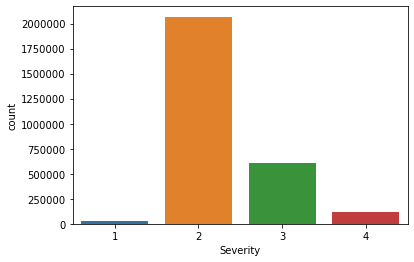

In [35]:
plt.ticklabel_format(style='plain', axis='y')
sns.countplot(x='Severity', data=df)

In [36]:
df.Severity.value_counts()

2    2068517
3     611938
4     114799
1      28182
Name: Severity, dtype: int64

##### *Analyzing POI Features*

POI(Point Of Interest) refers to any public service/place that happens to be near the accident location

In [37]:
poi_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop',
                'Traffic_Calming','Traffic_Signal','Turning_Loop']
poi_features

['Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop']

<AxesSubplot:xlabel='Bump', ylabel='count'>

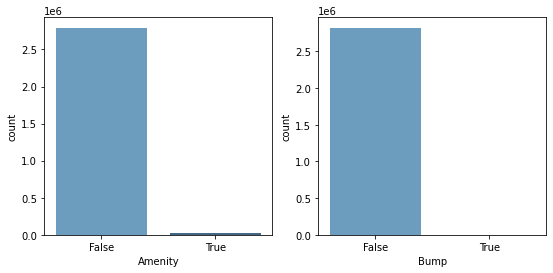

In [38]:
f, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.countplot(x='Amenity', data=df, ax=axes[0], palette='Blues_d')

sns.countplot(x='Bump', data=df, ax=axes[1], palette='Blues_d')

<AxesSubplot:xlabel='Give_Way', ylabel='count'>

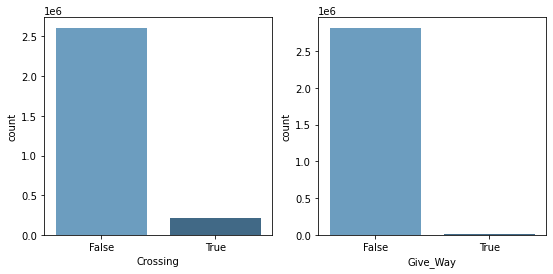

In [39]:
f, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.countplot(x='Crossing', data=df, ax=axes[0], palette='Blues_d')

sns.countplot(x='Give_Way', data=df, ax=axes[1], palette='Blues_d')

<AxesSubplot:xlabel='No_Exit', ylabel='count'>

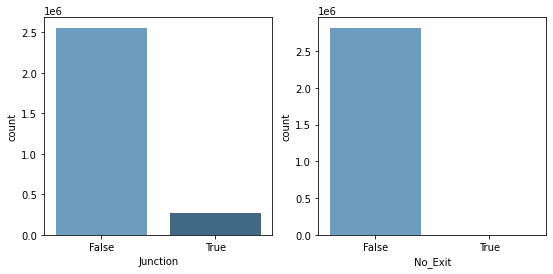

In [40]:
f, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.countplot(x='Junction', data=df, ax=axes[0], palette='Blues_d')

sns.countplot(x='No_Exit', data=df, ax=axes[1], palette='Blues_d')

<AxesSubplot:xlabel='Roundabout', ylabel='count'>

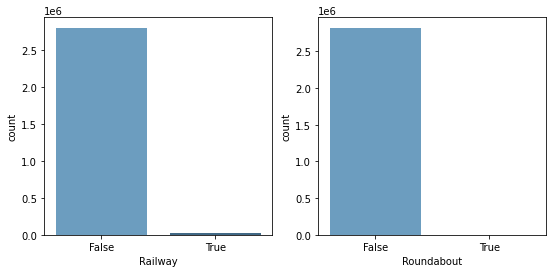

In [41]:
f, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.countplot(x='Railway', data=df, ax=axes[0], palette='Blues_d')

sns.countplot(x='Roundabout', data=df, ax=axes[1], palette='Blues_d')

<AxesSubplot:xlabel='Stop', ylabel='count'>

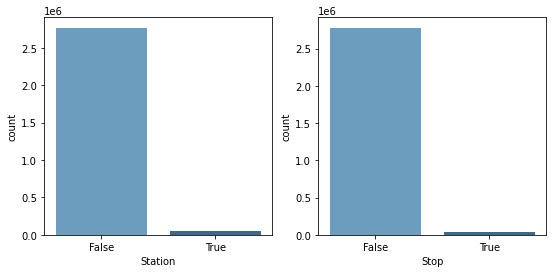

In [42]:
f, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.countplot(x='Station', data=df, ax=axes[0], palette='Blues_d')

sns.countplot(x='Stop', data=df, ax=axes[1], palette='Blues_d')


<AxesSubplot:xlabel='Traffic_Signal', ylabel='count'>

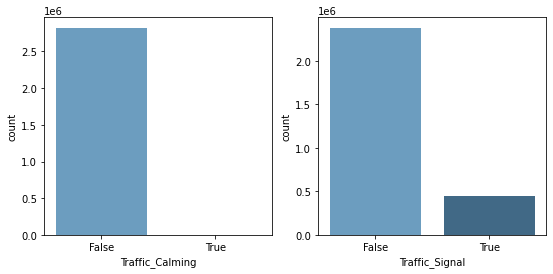

In [43]:
f, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.countplot(x='Traffic_Calming', data=df, ax=axes[0], palette='Blues_d')

sns.countplot(x='Traffic_Signal', data=df, ax=axes[1], palette='Blues_d')


<AxesSubplot:xlabel='Turning_Loop', ylabel='count'>

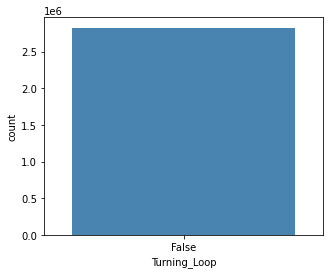

In [44]:
f, axes = plt.subplots(1, 1, figsize=(5, 4))

sns.countplot(x='Turning_Loop', data=df, ax=axes, palette='Blues_d')

In [45]:
# Dropping POI features that have no impact on the occurance of an accident

df = df.drop(['Amenity','Bump','Give_Way','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Turning_Loop'],axis=1)

##### *Analyzing datetime features*

<AxesSubplot:xlabel='Year', ylabel='count'>

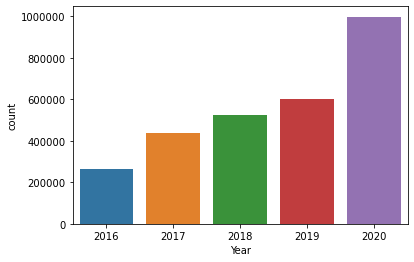

In [46]:
# Accidents per year

plt.ticklabel_format(style='plain', axis='y')

sns.countplot(data=df,x=df['Year'])

The increase in accidents year-on-year cannot be so significant, considering the fact that there has to be a decrease in accidents due to covid-19 lockdowns. 
It seems a low number of accidents were recorded in the previous years.

<AxesSubplot:xlabel='Month', ylabel='count'>

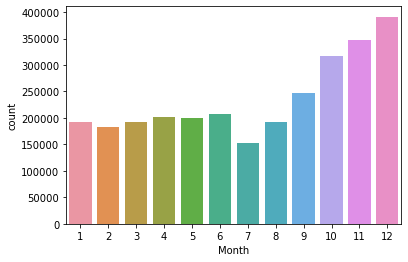

In [47]:
# Analysing the monthly distribution of data

sns.countplot(data=df,x=df['Month'])

There seems to be a significant increase in the number of accidents during winter.

<AxesSubplot:xlabel='Weekday', ylabel='count'>

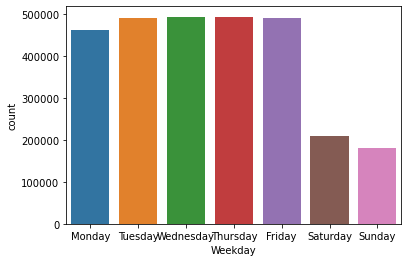

In [48]:
# Analysing the data by days of the week

sns.countplot(data=df,x=df['Weekday'],
             order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

There is a significant drop in the number of accidents on weekends, which may indicate that most of the accidents happen when people travel to or from their work locations.

<AxesSubplot:xlabel='Hour', ylabel='count'>

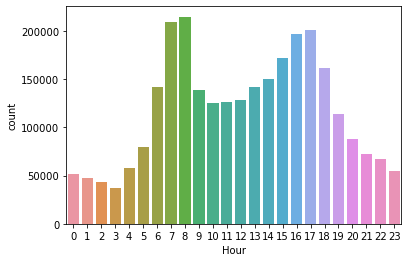

In [49]:
# Analysing the data by hour of the day

sns.countplot(data=df,x=df['Hour'])

It seems there is a clear relation to number of accidents and the time of the day when people are travelling.

<AxesSubplot:xlabel='Astronomical_Twilight', ylabel='count'>

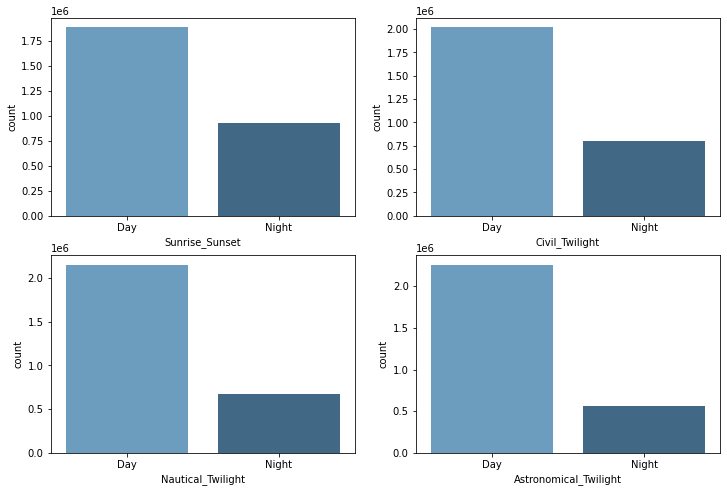

In [50]:
# Period of day attributes

f, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(x='Sunrise_Sunset', data=df, ax=axes[0, 0], palette='Blues_d')

sns.countplot(x='Civil_Twilight', data=df, ax=axes[0, 1], palette='Blues_d')

sns.countplot(x='Nautical_Twilight', data=df, ax=axes[1, 0], palette='Blues_d')

sns.countplot(x='Astronomical_Twilight', data=df, ax=axes[1, 1], palette='Blues_d')

<AxesSubplot:xlabel='State', ylabel='count'>

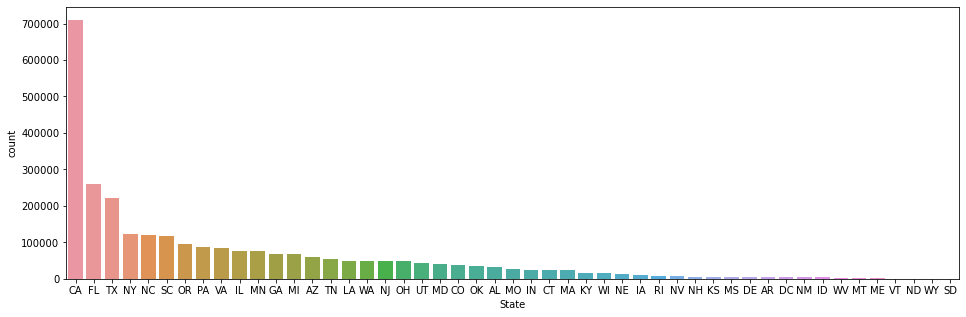

In [51]:
# Analysing the accidents by state

fig = plt.figure(figsize = (16,5))

sns.countplot(data=df,x='State',
             order=df['State'].value_counts().index)

##### *Analysing the weather features*

<AxesSubplot:xlabel='Temperature(F)', ylabel='Count'>

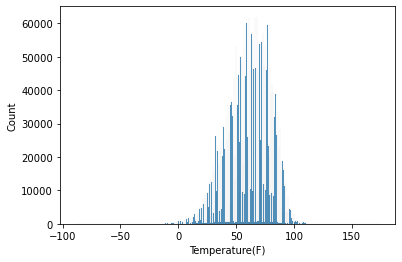

In [52]:
sns.histplot(data=df,x='Temperature(F)')

<AxesSubplot:xlabel='Humidity(%)', ylabel='Count'>

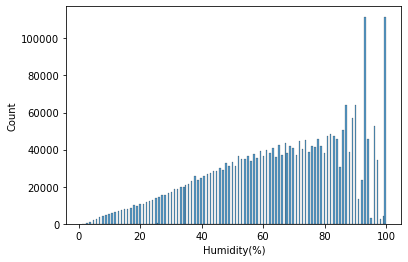

In [53]:
sns.histplot(data=df,x='Humidity(%)')

There seems to be a linear relation of an accident happening with humidity.

C:\Users\devde\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

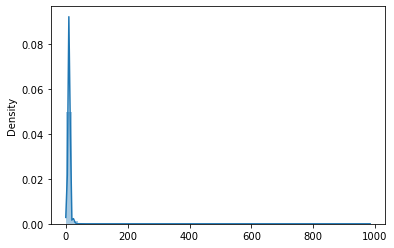

In [54]:
sns.distplot(x=df['Wind_Speed(mph)'])

<AxesSubplot:xlabel='Wind_Direction', ylabel='count'>

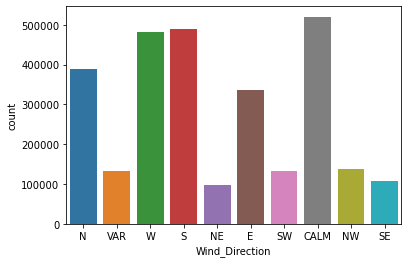

In [55]:
sns.countplot(data=df,x='Wind_Direction')

Univariate analysis of the weather features does not give us any more clearer picture of the data.

We will now look at the data based on the level of severity of the accident.

### Bivariate Analysis

<AxesSubplot:xlabel='count', ylabel='Month'>

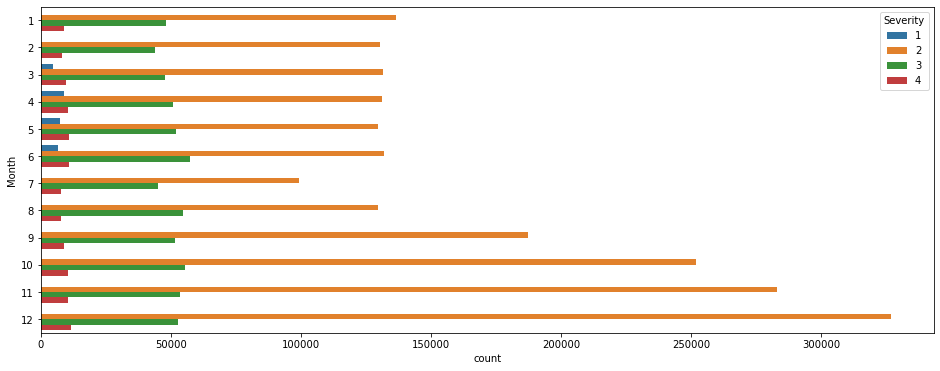

In [56]:
# 'Month' & 'Severity'

fig = plt.figure(figsize = (16, 6))
sns.countplot(y="Month", data=df, hue='Severity')

<AxesSubplot:xlabel='count', ylabel='Weekday'>

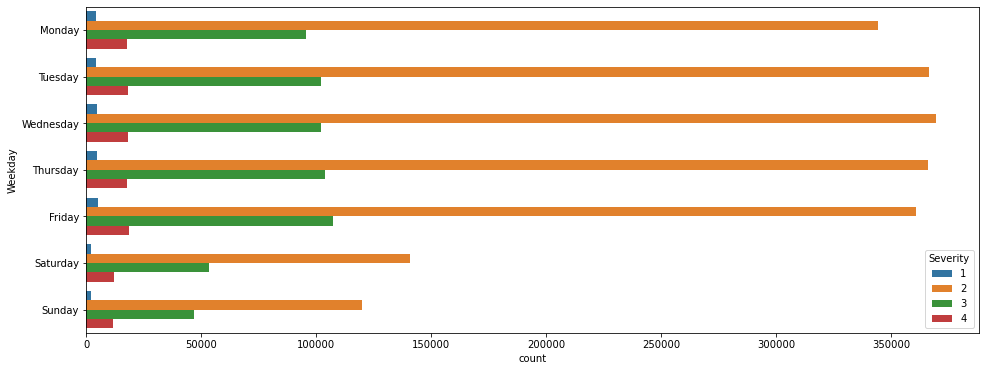

In [57]:
# 'Weekday' & 'Severity'

fig = plt.figure(figsize = (16, 6))
sns.countplot(y="Weekday", data=df, hue='Severity',
             order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

<AxesSubplot:xlabel='State', ylabel='count'>

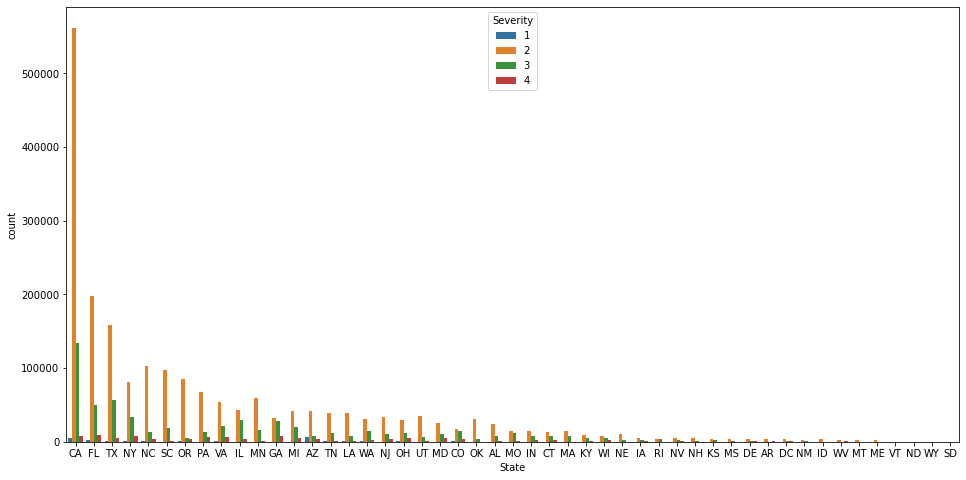

In [58]:
# 'State' & 'Severity'

fig = plt.figure(figsize = (16, 8))
sns.countplot(x="State", data=df, order=df['State'].value_counts().index, hue='Severity')

<AxesSubplot:xlabel='Wind_Speed(mph)', ylabel='Severity'>

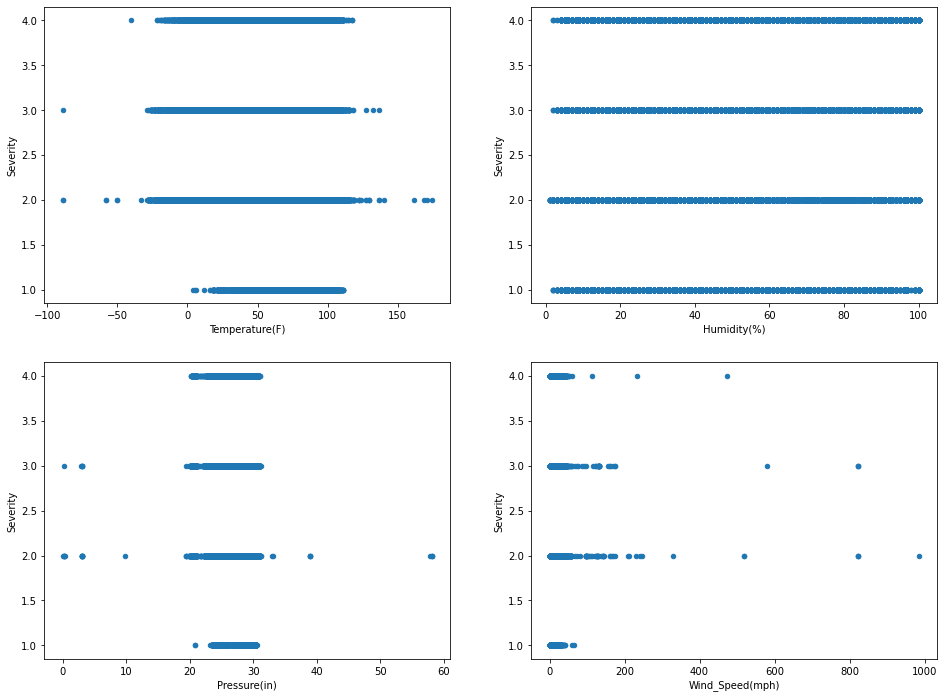

In [59]:
f, axes = plt.subplots(2, 2, figsize=(16, 12))

# Analysing the impact of 'Temperature(F)' on 'Severity'
df.plot.scatter(x='Temperature(F)', y='Severity', ax=axes[0, 0])

# Analysing the impact of 'Humidity(%)' on 'Severity'
df.plot.scatter(x='Humidity(%)', y='Severity', ax=axes[0, 1])

# Analysing the impact of 'Pressure(in)' on 'Severity'
df.plot.scatter(x='Pressure(in)', y='Severity', ax=axes[1, 0])

# Analysing the impact of 'Wind_Speed(mph)' on 'Severity'
df.plot.scatter(x='Wind_Speed(mph)', y='Severity', ax=axes[1, 1])

In [60]:
# There are very few instances when wind speed reaches over 200, that too in case of a hurricane or tornado.
# Removing records that have wind speed over 200

df.drop(df[df['Wind_Speed(mph)'] > 200].index, inplace = True)

<AxesSubplot:xlabel='Visibility(mi)', ylabel='Severity'>

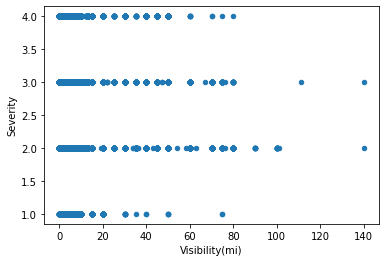

In [61]:
df.plot.scatter(x='Visibility(mi)', y='Severity')

In [62]:
# As seen from the analysis, we drop columns that do not have any effect on an accident.

df.drop(['Visibility(mi)','Duration','Wind_Direction','Pressure(in)','Humidity(%)','Weather_Timestamp','Distance(mi)'],axis=1,inplace=True)

In [63]:
# As seen above there is no relation between 'Period-of-Day' and an accident happening

df.drop(['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'],axis=1,inplace=True)

### Multivariate Analysis

<AxesSubplot:>

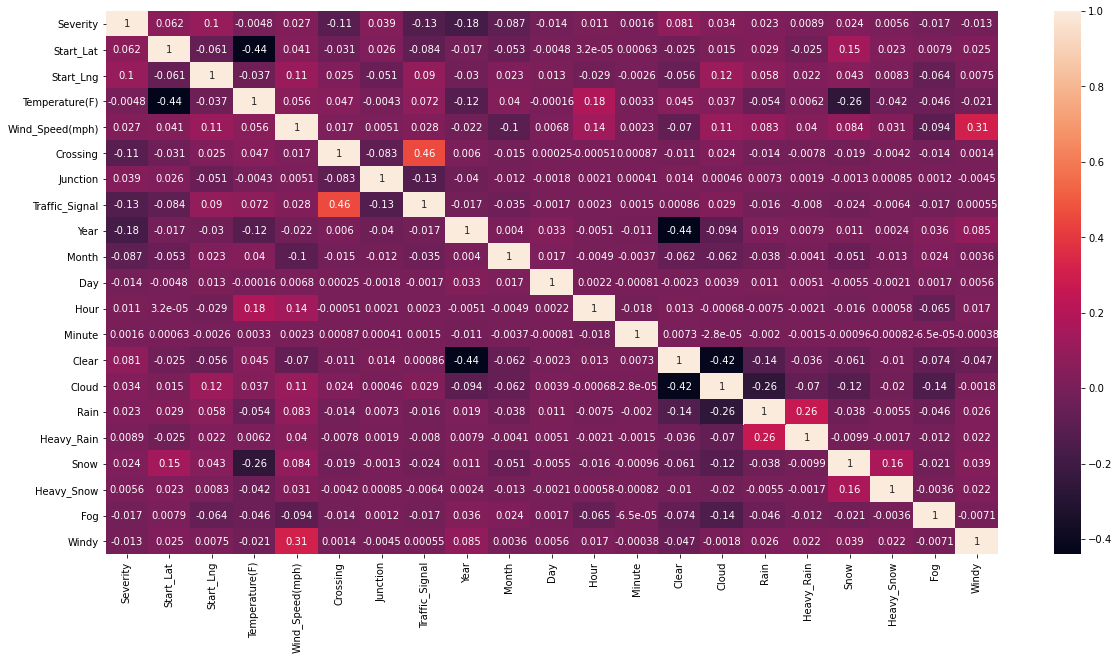

In [64]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)



## Model Building

In [77]:
df.Severity.value_counts()

2    2068505
3     611934
4     114797
1      28182
Name: Severity, dtype: int64

In [78]:
# Since the original dataset is highly imbalanced  for severity, let us create a balanced training dataset

df_s1 = df.loc[df['Severity']==1]
df_s2 = df.loc[df['Severity']==2]
df_s3 = df.loc[df['Severity']==3]
df_s4 = df.loc[df['Severity']==4]

In [79]:
count = 25000

df_s1 = resample(df_s1, replace=df_s1.count()[0]<count, n_samples=count, random_state=42)
df_s2 = resample(df_s2, replace=df_s2.count()[0]<count, n_samples=count, random_state=42)
df_s3 = resample(df_s3, replace=df_s3.count()[0]<count, n_samples=count, random_state=42)
df_s4 = resample(df_s4, replace=df_s4.count()[0]<count, n_samples=count, random_state=42)
 
new_df = pd.concat([df_s1, df_s2, df_s3, df_s4])
 
# Display Severity counts
new_df.groupby(by='Severity')['Severity'].count()

Severity
1    25000
2    25000
3    25000
4    25000
Name: Severity, dtype: int64

In [80]:
# Target variable for prediction
target = 'Severity'

X = new_df.drop(target,axis=1)
y = new_df[target]

In [81]:
cols = new_df.select_dtypes(include='object').columns

# Applying Ordinal Encoding on the data
encoder = OrdinalEncoder()
X[cols] = encoder.fit_transform(X[cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


# Scaling the Train and Test Dataset
scaler = StandardScaler()

# Scaling Train Dataset
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Scaling Test Dataset
scaler = scaler.fit(X_test)
X_test = scaler.transform(X_test)

##### XGBoost

In [82]:
# Make an object of class XGBClassifier()

clf = XGBClassifier()

# Train & Test
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Accuracy
print("XGBClassifier accuracy_score: {:.3f}.".format(accuracy_score(y_test, y_pred)))

C:\Users\devde\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier accuracy_score: 0.734.


In [83]:
# Using GridSearchCV to find optimal parameters

param_grid = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, subsample=0.7, 
                                                     colsample_bytree=0.7, objective= 'multi:softmax', seed=42), 
                             param_grid = param_grid, n_jobs=4, cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

C:\Users\devde\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'max_depth': 9, 'min_child_weight': 3}


In [84]:
# XGBClassifier | Final 

# Create a XGBClassifier Classifier

clf=XGBClassifier(**grid_search.best_params_ , random_state=42)

# Train & Test
clf.fit(X_train, y_train)
y_train_pred= clf.predict(X_train)
y_test_pred= clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
# Detailed report of classification done by model

train_accuracy, test_accuracy = accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
print(f'Accuracy for the train dataset {train_accuracy:.1%}')
print(f'Accuracy for the test dataset {test_accuracy:.1%}')

[21:00:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       0.89      0.96      0.92      7500
           2       0.70      0.67      0.68      7500
           3       0.63      0.67      0.65      7500
           4       0.73      0.66      0.70      7500

    accuracy                           0.74     30000
   macro avg       0.74      0.74      0.74     30000
weighted avg       0.74      0.74      0.74     30000

Accuracy for the train dataset 92.7%
Accuracy for the test dataset 73.8%


In [85]:
# storing the accuracy score
xgb_train_result = round(train_accuracy*100, 1)
xgb_test_result = round(test_accuracy*100,1)

##### Support Vector Machine

In [86]:
# Make an object of class SVC()

clf = SVC()

# Train & Test
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Accuracy
print("Support Vector Machine accuracy_score: {:.3f}.".format(accuracy_score(y_test, y_pred)))

Support Vector Machine accuracy_score: 0.659.


In [ ]:
# Using GridSearchCV to find optimal parameters

param_grid = {
    'C': [0.1, 0.5, 1],
    'gamma': ['auto', 'scale']
}

grid_search = GridSearchCV(cv=5, estimator = clf, param_grid = param_grid, scoring='balanced_accuracy')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

In [ ]:
# Support Vector Machine | Final 

# Create a SVM Classifier

clf=SVC(**grid_search.best_params_, kernel='rbf', random_state=42)

# Train & Test
clf.fit(X_train, y_train)
y_train_pred= clf.predict(X_train)
y_test_pred= clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
# Detailed report of classification done by model

train_accuracy, test_accuracy = accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
print(f'Accuracy for the train dataset {train_accuracy:.1%}')
print(f'Accuracy for the test dataset {test_accuracy:.1%}')



In [ ]:
# storing the accuracy score
svm_train_result = round(train_accuracy*100, 1)
svm_test_result = round(test_accuracy*100,1)